# Sentiment Analysis Classification on 1.6M Tweets

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import re
import time
import seaborn as sns
import matplotlib.pyplot as plt
!pip install nltk
!pip install xgboost
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
!pip install wordcloud
from wordcloud import WordCloud
import pickle
!pip install spacy
import spacy
from nltk.tokenize import word_tokenize
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 2.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 10.0 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 37.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 76.4 MB/s et

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.6 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Handling Multiple Encodings in CSV File Reading

In [3]:
#This script iterates through different encoding formats to read a CSV file, 
# handling any potential Unicode-related errors (UnicodeDecodeError, UnicodeError, LookupError).
# The purpose is to identify the correct encoding format for reading the CSV file without errors.

encoding = [
    "ASCII",
    "UTF-8",
    "UTF-16",
    "UTF-32",
    "ISO-8859-1",
    "Windows-1252",
    "UTF-7",
    "UTF-EBCDIC",
    "UTF-16LE",
    "UTF-16BE",
    "UTF-32LE",
    "UTF-32BE",
    "ISO-8859-2",
    "ISO-8859-3",
    "ISO-8859-4",
    "ISO-8859-5",
    "ISO-8859-6",
    "ISO-8859-7",
    "ISO-8859-8",
    "ISO-8859-9",
    "ISO-8859-10",
    "ISO-8859-11",
    "ISO-8859-13",
    "ISO-8859-14",
    "ISO-8859-15",
    "ISO-8859-16",
    "KOI8-R",
    "KOI8-U",
    "GB2312",
    "GBK",
    "Shift_JIS",
    "EUC-JP"
]


In [4]:
# Loop through different encoding formats and attempt to read the CSV file
filepath=r"/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv"
for i in encoding:
    try:
        # Attempt to read the CSV file with the given encoding
        pd.read_csv(filepath, encoding=i)
        # If successful, print the encoding used
        print(i)
    except (UnicodeDecodeError, UnicodeError, LookupError):
        # Pass through any Unicode-related errors and continue to the next encoding
        pass

ISO-8859-1
Windows-1252
ISO-8859-2
ISO-8859-4
ISO-8859-5
ISO-8859-9
ISO-8859-10
ISO-8859-13
ISO-8859-14
ISO-8859-15
ISO-8859-16
KOI8-R
KOI8-U


In [5]:
#Reading the .csv file
df=pd.read_csv(r"/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [7]:
#Shape of the Data
df.shape

(1599999, 6)

# Exploratory Data Analysis
- Getting the insights from the data.
- Missing values.
- Outliers.
- Duplicated values.
- Distributions.
- Relationships.

In [8]:
#Renaming the columns
columns=["target","id","date","flag","user","text"]
df=pd.read_csv(r"/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1',names=columns)
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
# Checking the missing values
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [10]:
#Information about the dataet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [11]:
#Shape of the data
df.shape

(1600000, 6)

In [12]:
#Checking the Duplicated values
df.duplicated().sum()

0

# Data Preprocessing
Data preprocessing is the process of cleaning and transforming raw data into a usable format for machine learning models. It involves handling missing values, removing duplicates, normalizing or scaling data, and encoding categorical variables, making the dataset ready for analysis and improving model performance.

In [13]:
# Replacing the Target variable value "4" to "1"
df["target"].unique()

array([0, 4])

In [14]:
df["target"]=df["target"].replace({4:1})
df["target"].unique()

array([0, 1])

# Natural Language Processing (NLP)
- Natural Language Processing is the branch of Linguistics, Computer Science and Artificial Intelligence which deals with the interaction of humans with the machines.


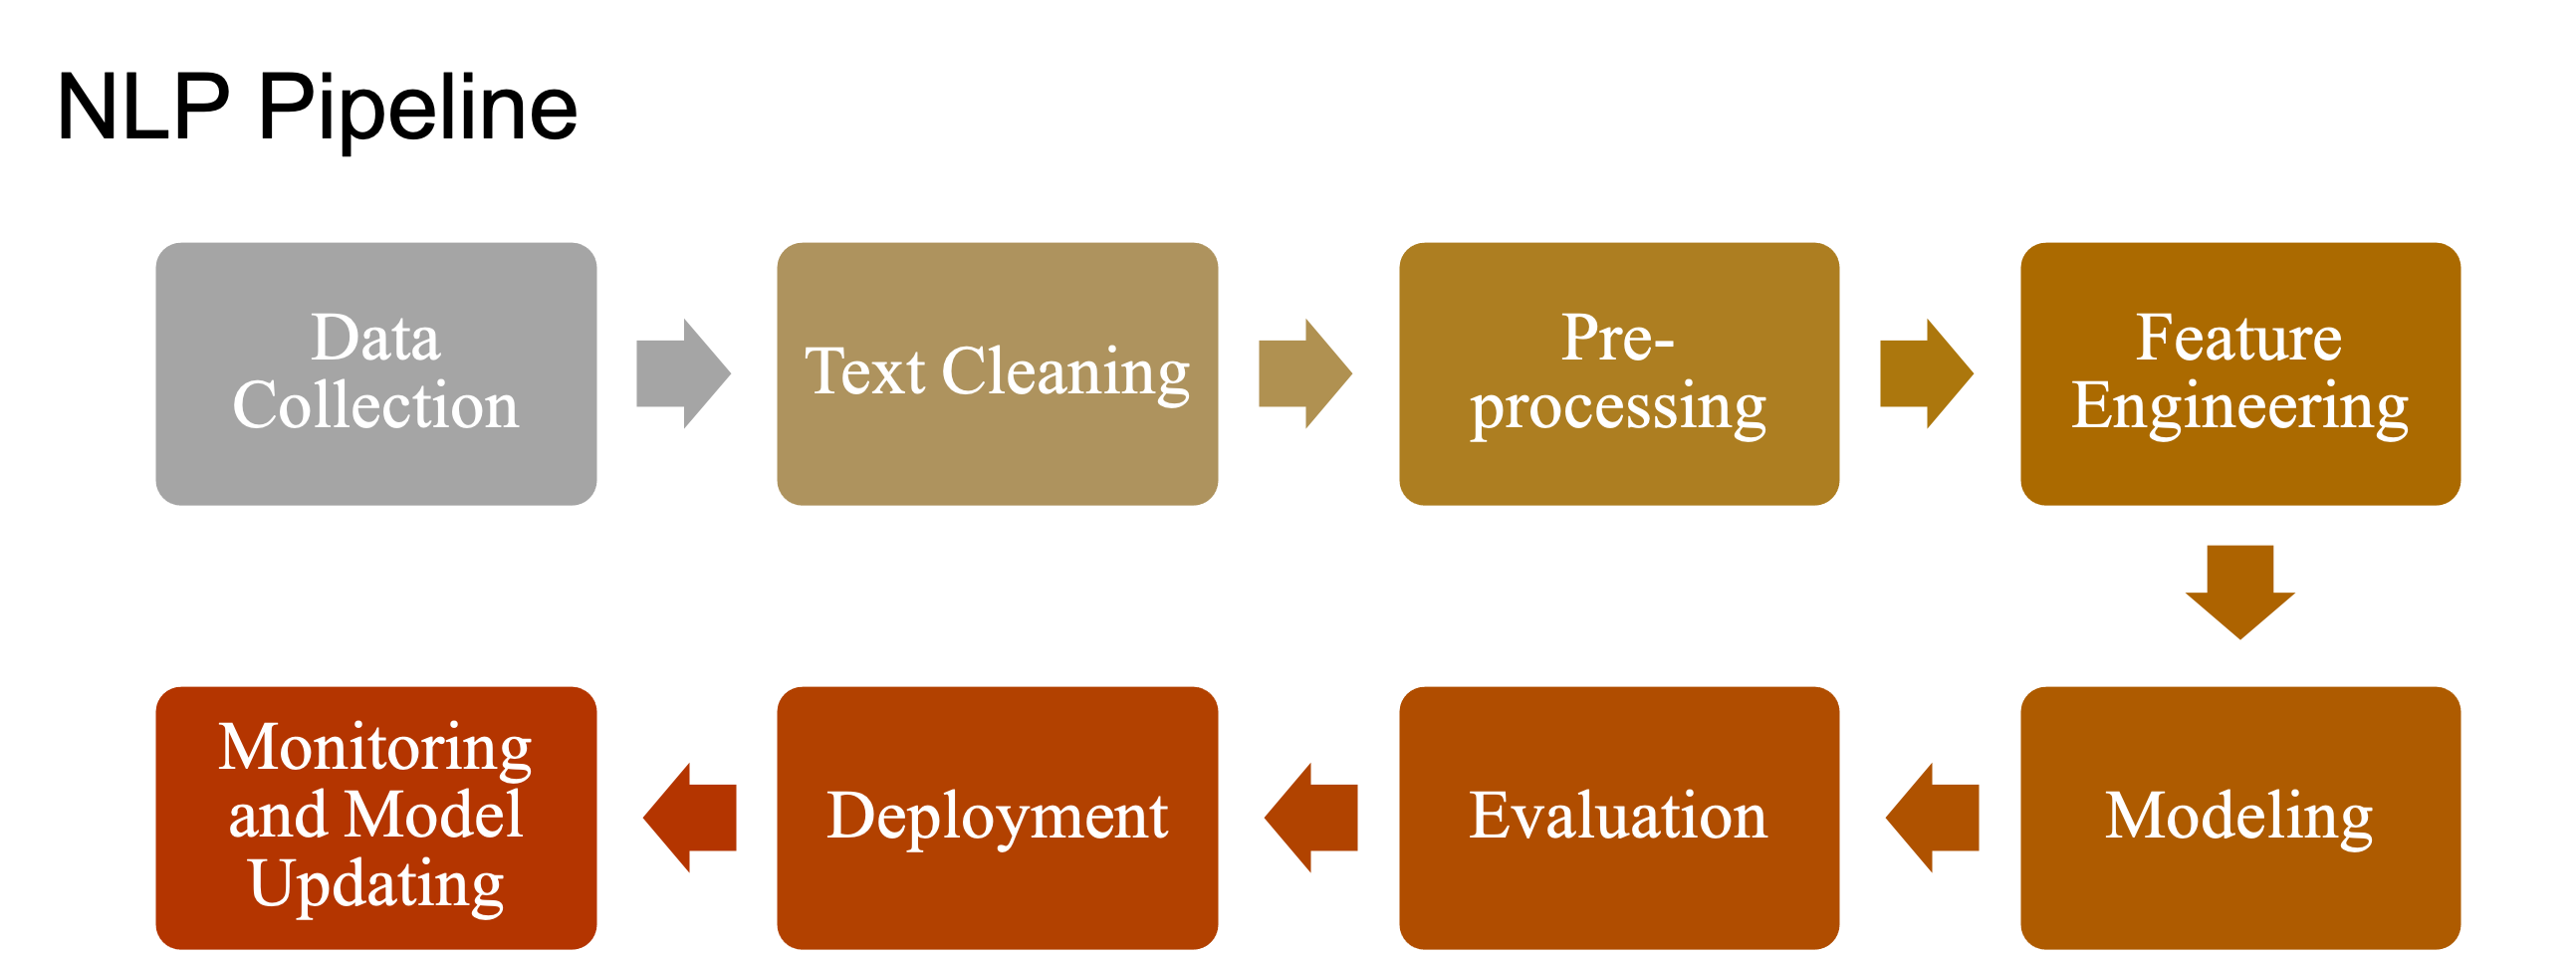

# Text Preprocessing
Text preprocessing is the process of cleaning and transforming raw text data into a format suitable for analysis. It includes steps like removing punctuation, converting text to lowercase, eliminating stopwords, tokenizing words, and stemming or lemmatizing to reduce words to their base forms, helping improve the accuracy of natural language processing (NLP) models.

# Stemming
- Coverting the text into root word

In [15]:
# Initialize PorterStemmer and WordNetLemmatizer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function for stemming, lemmatization, and cleaning
def clean_and_process_text(text):
    # Remove HTML tags using regex
    text = re.sub(r'<.*?>', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove non-alphabet characters and convert to lowercase
    processed_content = re.sub('[^a-zA-Z]', ' ', text)
    processed_content = processed_content.lower()
    
    # Split into words
    words = processed_content.split()
    
    # Remove stopwords and apply stemming and lemmatization
    processed_content = [ps.stem(lemmatizer.lemmatize(word)) for word in words if word not in stopwords.words('english')]
    
    # Join the processed words back into a single string
    processed_content = ' '.join(processed_content)
    
    return processed_content

In [16]:
df["stemmed_content"]=df["text"].apply(clean_and_process_text)
df.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot bummer shoulda got david carr third...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [17]:
X=df["stemmed_content"].values
y=df["target"].values

# Splitting the data into train and test

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)


# Text Vectorization

In [36]:
tfidf=TfidfVectorizer(max_features=1000)
X_train1=tfidf.fit_transform(X_train)
X_test1=tfidf.transform(X_test)

# Model Building
Model building is the process of creating a mathematical or statistical representation of real-world scenarios to make predictions or identify patterns. It involves selecting features, choosing a suitable algorithm, training the model on data, and evaluating its performance to make informed decisions or predictions on new data

# Logistic Regression

In [20]:
start=time.time()
lg=LogisticRegression()
lg.fit(X_train1,y_train)
X_train_pred_lg=lg.predict(X_train1)
y_pred_lg=lg.predict(X_test1)
lg_time = time.time() - start
print("Time for Logistic Regression: ",lg_time)
print("*"*90)
lg_train_accuracy=accuracy_score(X_train_pred_lg,y_train)
lg_test_accuracy=accuracy_score(y_test,y_pred_lg)
print("Training Accuracy Score: ",accuracy_score(X_train_pred_lg,y_train))
print("Testing Accuracy Score: ",accuracy_score(y_test,y_pred_lg))
print("*"*90)
print(classification_report(y_test,y_pred_lg))

Time for Logistic Regression:  2.1260011196136475
******************************************************************************************
Training Accuracy Score:  0.746625
Testing Accuracy Score:  0.747203125
******************************************************************************************
              precision    recall  f1-score   support

           0       0.76      0.72      0.74    159994
           1       0.73      0.78      0.75    160006

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



# Confusion matrix for Logistic Regression

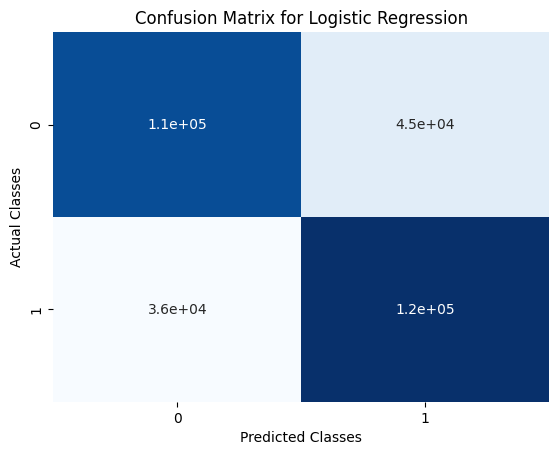

In [21]:
cm=confusion_matrix(y_test,y_pred_lg)
sns.heatmap(data=cm,annot=True,xticklabels=[0,1],yticklabels=[0,1],cbar=False,cmap="Blues")
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# AUC-ROC Curve for Logistic Regression

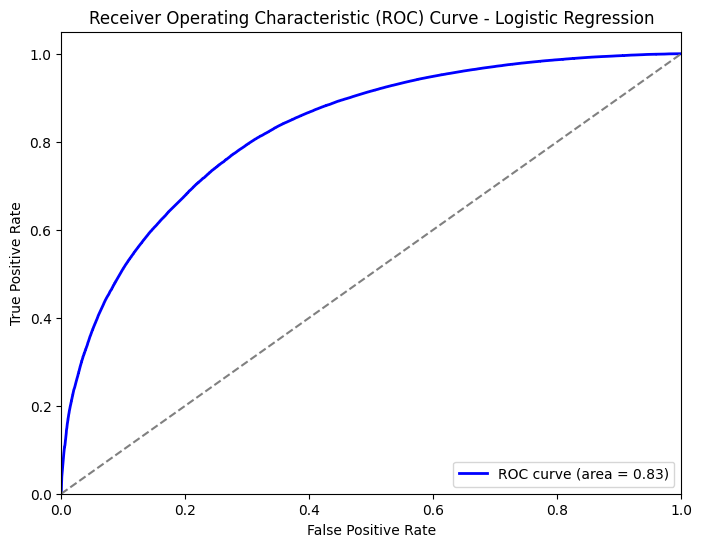

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC-AUC curve
y_prob_lg = lg.predict_proba(X_test1)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lg)
roc_auc_lg = auc(fpr, tpr)

# Plotting the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lg))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# Naive Bayes

In [23]:
MB_start=time.time()
Mb=MultinomialNB()
Mb.fit(X_train1,y_train)
X_train_pred_MB=Mb.predict(X_train1)
y_pred_MB=Mb.predict(X_test1)
MB_time = time.time() - MB_start
print("Time for Naive Bayes: ",MB_time)
print("*"*90)
MB_train_accuracy=accuracy_score(X_train_pred_MB,y_train)
MB_test_accuracy=accuracy_score(y_test,y_pred_MB)
print("Training Accuracy Score: ",accuracy_score(X_train_pred_MB,y_train))
print("Testing Accuracy Score: ",accuracy_score(y_test,y_pred_MB))
print("*"*90)
print(classification_report(y_test,y_pred_MB))

Time for Naive Bayes:  0.27811479568481445
******************************************************************************************
Training Accuracy Score:  0.73362265625
Testing Accuracy Score:  0.734503125
******************************************************************************************
              precision    recall  f1-score   support

           0       0.73      0.74      0.74    159994
           1       0.74      0.73      0.73    160006

    accuracy                           0.73    320000
   macro avg       0.73      0.73      0.73    320000
weighted avg       0.73      0.73      0.73    320000



# Confusion matrix for Naive Bayes Classifier

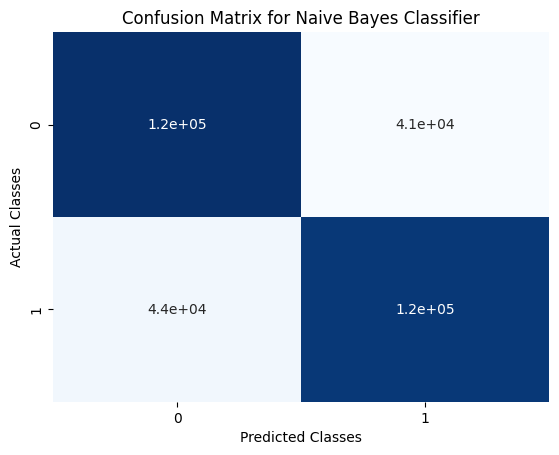

In [24]:
cm=confusion_matrix(y_test,y_pred_MB)
sns.heatmap(data=cm,annot=True,xticklabels=[0,1],yticklabels=[0,1],cbar=False,cmap="Blues")
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

# AUC-ROC Curve for Naive Bayes

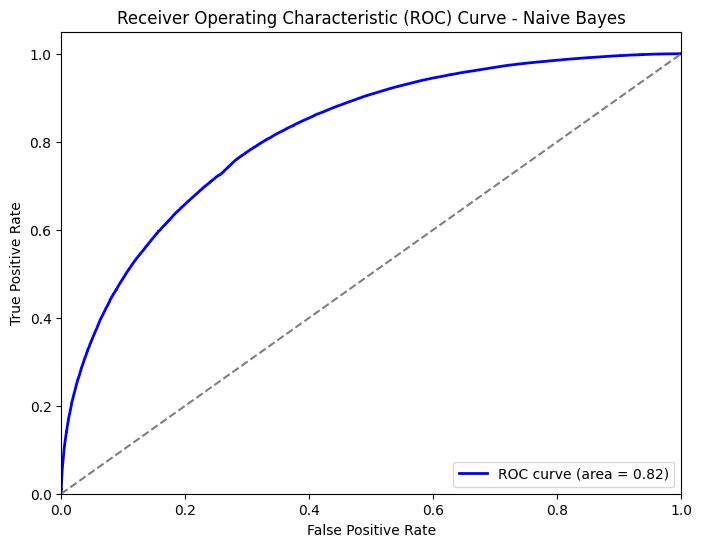

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC-AUC curve
y_prob_MB = Mb.predict_proba(X_test1)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_MB)
roc_auc_mb = auc(fpr, tpr)

# Plotting the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_mb))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


# AdaBoost Classifier

In [26]:
ada_start=time.time()
ada=AdaBoostClassifier()
ada.fit(X_train1,y_train)
X_train_pred_ADA=ada.predict(X_train1)
y_pred_ADA=ada.predict(X_test1)
ada_time = time.time() - ada_start
print("Time for AdaBoost Classifier: ",ada_time)
print("*"*90)
ADA_train_accuracy=accuracy_score(X_train_pred_ADA,y_train)
ADA_test_accuracy=accuracy_score(y_test,y_pred_ADA)
print("Training Accuracy Score: ",accuracy_score(X_train_pred_ADA,y_train))
print("Testing Accuracy Score: ",accuracy_score(y_test,y_pred_ADA))
print("*"*90)
print(classification_report(y_test,y_pred_ADA))

Time for AdaBoost Classifier:  106.15928483009338
******************************************************************************************
Training Accuracy Score:  0.66904453125
Testing Accuracy Score:  0.67056875
******************************************************************************************
              precision    recall  f1-score   support

           0       0.79      0.46      0.58    159994
           1       0.62      0.88      0.73    160006

    accuracy                           0.67    320000
   macro avg       0.71      0.67      0.66    320000
weighted avg       0.71      0.67      0.66    320000



# Confusion Matrix for AdaBoost Classifier

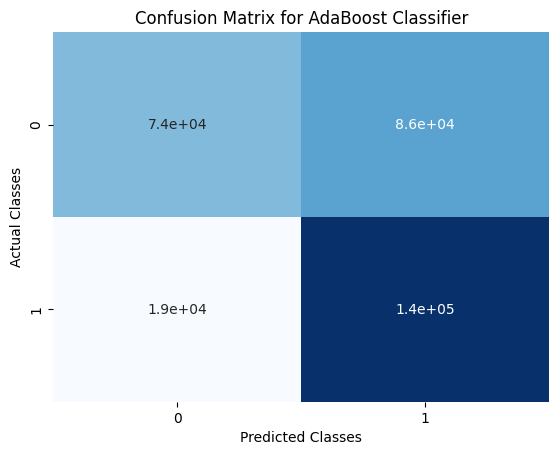

In [27]:
cm=confusion_matrix(y_test,y_pred_ADA)
sns.heatmap(data=cm,annot=True,xticklabels=[0,1],yticklabels=[0,1],cbar=False,cmap="Blues")
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.show()

# AUC-ROC Curve for AdaBoost Classifier

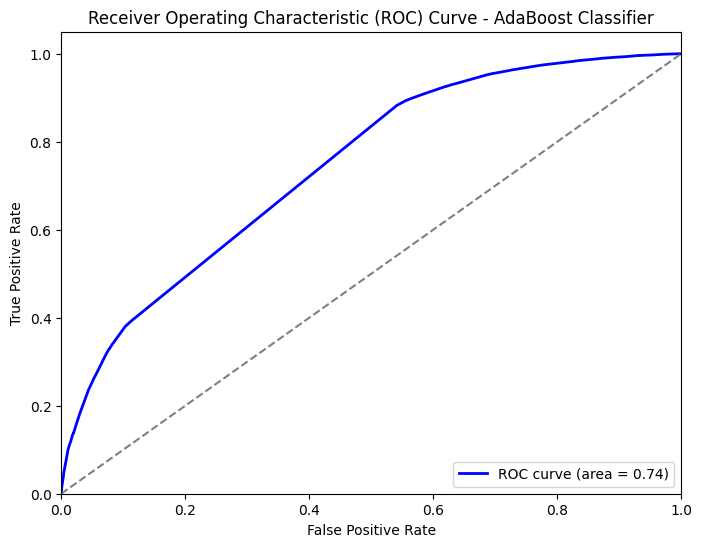

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC-AUC curve
y_prob_ADA = ada.predict_proba(X_test1)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ADA)
roc_auc_ada = auc(fpr, tpr)

# Plotting the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_ada))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost Classifier')
plt.legend(loc="lower right")
plt.show()


# XGB Classifier

In [29]:
##xgb=XGBClassifier(m)
#from xgboost import XGBClassifier

xgb_start=time.time()
xgb = XGBClassifier(
    # Core Parameters
    n_estimators=200,           # Number of trees (boosting rounds)
    learning_rate=0.1,          # Step size shrinkage (eta)
    max_depth=6,                # Maximum depth of a tree
    min_child_weight=1,         # Minimum sum of instance weight (hessian) needed in a child
    gamma=0, 
    n_jobs=-1)
   

xgb.fit(X_train1,y_train)
X_train_pred_xgb=xgb.predict(X_train1)
y_pred_xgb=xgb.predict(X_test1)
xgb_time = time.time() - xgb_start
print("Time for XGBoost Classifier: ",xgb_time)
print("*"*90)
xgb_train_accuracy=accuracy_score(X_train_pred_xgb,y_train)
xgb_test_accuracy=accuracy_score(y_test,y_pred_xgb)
print("Training Accuracy Score: ",accuracy_score(X_train_pred_xgb,y_train))
print("Testing Accuracy Score: ",accuracy_score(y_test,y_pred_xgb))
print("*"*90)
print(classification_report(y_test,y_pred_xgb))

Time for XGBoost Classifier:  32.444785833358765
******************************************************************************************
Training Accuracy Score:  0.72963984375
Testing Accuracy Score:  0.727603125
******************************************************************************************
              precision    recall  f1-score   support

           0       0.79      0.62      0.70    159994
           1       0.69      0.83      0.75    160006

    accuracy                           0.73    320000
   macro avg       0.74      0.73      0.72    320000
weighted avg       0.74      0.73      0.72    320000



# AUC-ROC Curve for XGBoost Classifier

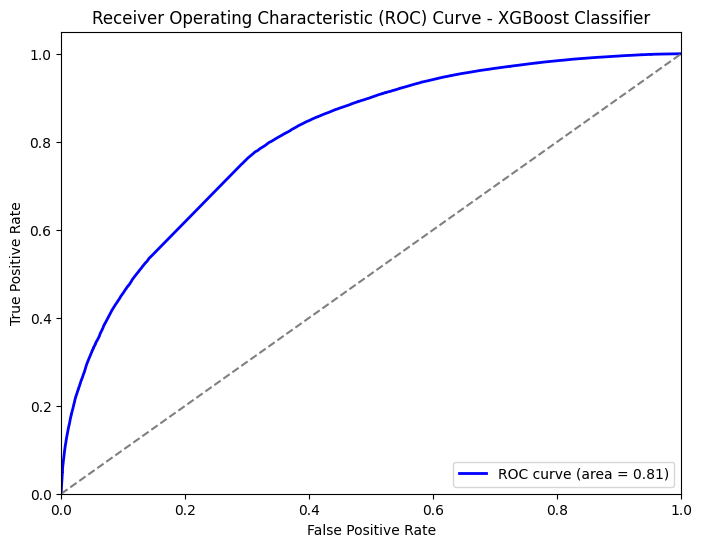

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC-AUC curve
y_prob_xgb = xgb.predict_proba(X_test1)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr, tpr)

# Plotting the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()


# Confusion Matrix for XGB Classifier

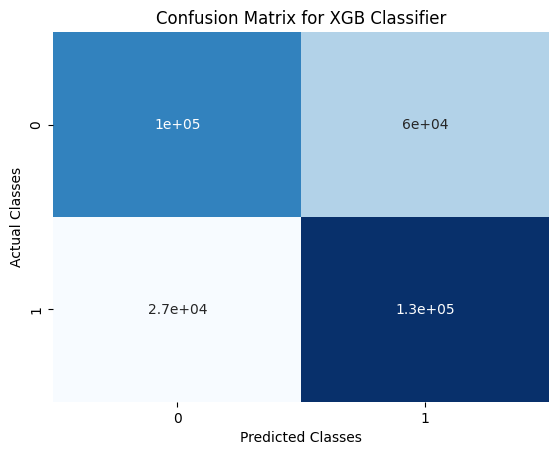

In [31]:
cm=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(data=cm,annot=True,xticklabels=[0,1],yticklabels=[0,1],cbar=False,cmap="Blues")
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.title("Confusion Matrix for XGB Classifier")
plt.show()

# Negetive Tweets

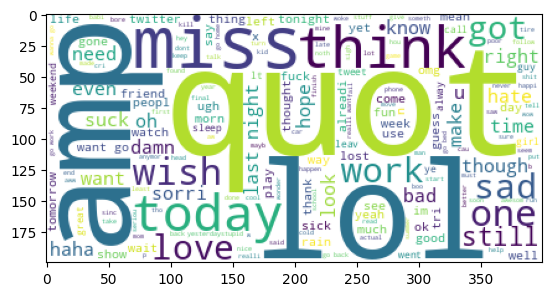

In [32]:
Negetive_tweets=" ".join(df[df["target"]==0]["stemmed_content"].values)
cloud=WordCloud(background_color="white").generate(Negetive_tweets)
plt.imshow(cloud)
plt.show()

# Positive Tweets

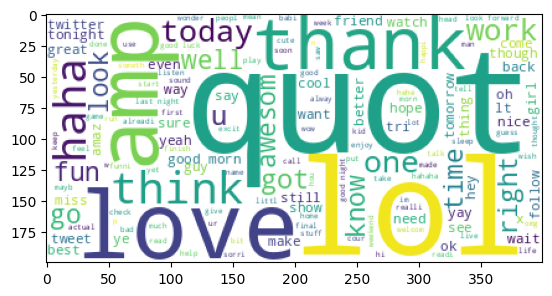

In [33]:
Positive_tweets=" ".join(df[df["target"]==1]["stemmed_content"].values)
cloud=WordCloud(background_color="white").generate(Positive_tweets)
plt.imshow(cloud)
plt.show()

# TF-IDF Word Importance

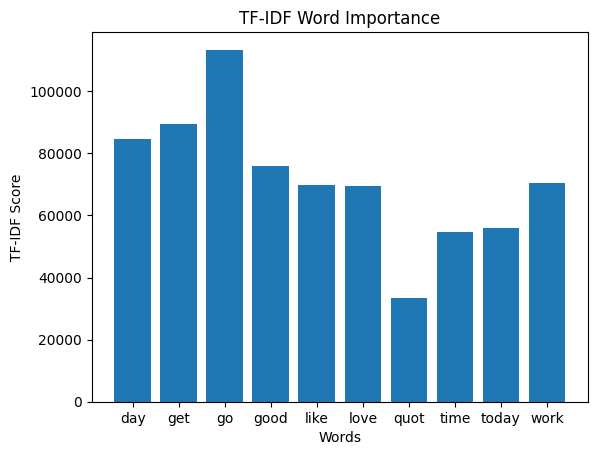

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Sample corpus
#corpus = ["This is the first document.", "This document is the second document.", "And this is the third one."]

# Compute TF-IDF
tfidf2 = TfidfVectorizer(max_features=10)
X = tfidf2.fit_transform(df["stemmed_content"])
features = tfidf2.get_feature_names_out()
tfidf_scores = X.sum(axis=0).A1

# Plot
plt.bar(features, tfidf_scores)
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.title('TF-IDF Word Importance')
plt.show()


# Insights:
## TF-IDF Word Importance:
The TF-IDF (Term Frequency-Inverse Document Frequency) score gives an indication of how important a word is in a given document or set of documents. The bar plot of TF-IDF word importance typically represents:

- X-axis (Words): The words selected based on their TF-IDF scores.
- Y-axis (TF-IDF Scores): The numerical values showing how important each word is in the corpus.
## What It Tells:
- Higher TF-IDF scores: Words that are more important to a specific document, i.e., they appear frequently in the document but are relatively rare in the rest of the corpus.
- Lower TF-IDF scores: Words that are either common across all documents (low importance) or rarely occur in the document.
In short, TF-IDF scores highlight words that are contextually important for a particular document but not overly common in the entire dataset.

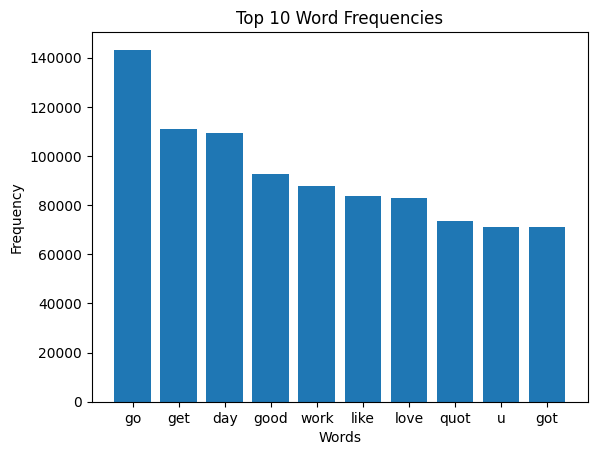

In [35]:
# Tokenize and remove stopwords for each document in the column
stop_words = set(stopwords.words('english'))

# Assuming df["stemmed_content"] is a Series with text data
words = []
for text in df["stemmed_content"]:
    tokens = word_tokenize(text.lower())  # Tokenize the text
    filtered_words = [word for word in tokens if word.isalpha() and word not in stop_words]  # Filter out stopwords and non-alphabetic words
    words.extend(filtered_words)  # Add to the main word list

# Get word frequencies
word_freq = Counter(words).most_common(10)

# Separate words and their frequencies
top_words, top_freqs = zip(*word_freq)

# Plotting the top 10 words and their frequencies
plt.bar(top_words, top_freqs)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequencies')
plt.show()


# Insights:
## TF-IDF Word Frequencies:
The word frequencies refer to how often a word appears across all documents, based on TF-IDF transformation. A bar plot of TF-IDF word frequencies can show:

- X-axis (Words): The same set of words as above.
- Y-axis (Summed TF-IDF values across documents): Shows the cumulative importance of a word across all documents.
## What It Tells:
- Higher bars: Words that are important across multiple documents but are still specific enough to stand out in certain documents.
- Lower bars: Words that either appear in only a few documents or are not as contextually significant.
Thus, the bar plot shows which words carry the most weight in terms of importance, as computed by TF-IDF. It helps identify words that provide the most unique or meaningful information about the dataset.

# POS Tag Distribution in Text Data

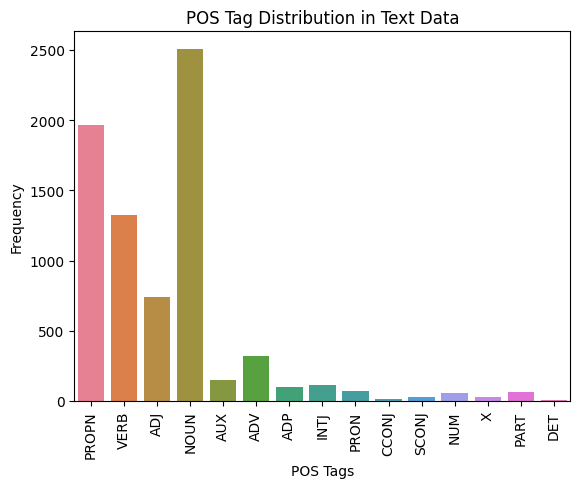

In [37]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Create a list to hold all POS tags
all_pos_tags = []

# Process each text in the "stemmed_content" column of the DataFrame
for text in df["stemmed_content"].head(1000):
    doc = nlp(text)  # Process the text with spaCy
    pos_tags = [token.pos_ for token in doc]  # Extract POS tags for each token
    all_pos_tags.extend(pos_tags)  # Add POS tags to the main list

# Count the frequency of each POS tag
pos_counts = Counter(all_pos_tags)

# Plot the POS tag distribution
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()),hue=list(pos_counts.keys()))
plt.title('POS Tag Distribution in Text Data')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Sentiment Score Distribution

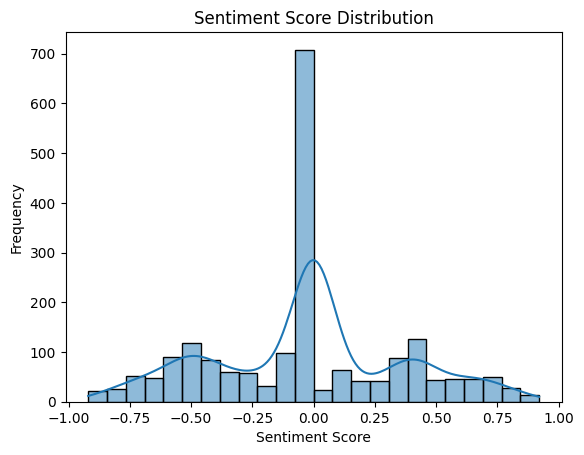

In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each text in df["stemmed_content"]
sentiments = [sia.polarity_scores(text)['compound'] for text in df["stemmed_content"].head(2000)]

# Plot the sentiment score distribution
sns.histplot(sentiments, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


# Explanation:
- Sentiment Analysis: The SentimentIntensityAnalyzer from NLTK assigns sentiment scores to text. The 'compound' score is used, which provides a normalized score between -1 (most negative) and 1 (most positive). It combines the positive, neutral, and negative scores into a single value.
- Applying Sentiment Analysis: For each entry in df["stemmed_content"], the polarity_scores function computes the sentiment score, and the 'compound' score is extracted.
- Plotting: The sns.histplot function creates a histogram to show the distribution of sentiment scores, with a kernel density estimate (KDE) overlaid for smoothness.
## What the Plot Tells:
- X-axis (Sentiment Score): Ranges from -1 to 1, where:
- -1 to 0: Negative sentiment.
- 0: Neutral sentiment.
- 0 to 1: Positive sentiment.
- Y-axis (Frequency): Shows how often a particular sentiment score appears in the dataset.
## Insights:
- A peak near 1: Indicates that the text in df["stemmed_content"] contains a lot of positive sentiments.
- A peak near -1: Would indicate that the text tends to have negative sentiments.
- A peak near 0: Suggests a predominance of neutral text.

# Top Bigram Frequencies

In [ ]:
from nltk.util import ngrams
# Ensure the NLTK 'punkt' tokenizer is available
nltk.download('punkt')

# Tokenize text in df["stemmed_content"]
words = [word_tokenize(text) for text in df["stemmed_content"]]

# Flatten the tokenized word lists into a single list
flat_words = [word.lower() for sublist in words for word in sublist if word.isalpha()]

# Generate bigrams (pairs of two words)
bigrams = list(ngrams(flat_words, 2))

# Get bigram frequencies
bigram_freq = Counter(bigrams).most_common(10)

# Prepare for plotting
bigrams, counts = zip(*bigram_freq)
bigrams = [' '.join(b) for b in bigrams]  # Convert tuples to strings for plotting

# Plot the top bigram frequencies
plt.bar(bigrams, counts)
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top Bigram Frequencies')
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


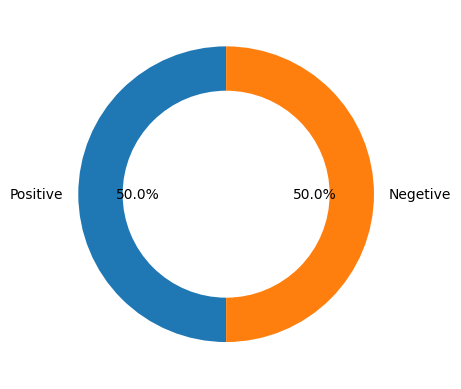

In [39]:
plt.pie(x=df["target"].value_counts(),labels=["Positive","Negetive"],autopct="%0.1f%%",startangle=90, 
               wedgeprops=dict(width=0.3))
plt.show()

# Accuracy Comparsion of Different Algorithms

In [40]:
Accuracy_Table=pd.DataFrame({"Algorithm":["Logistic Regression","Naive Bayes","AdaBoostClassifier","XGBoostClassifier"],
                            "Train Accuracy":[lg_train_accuracy,MB_train_accuracy,ADA_train_accuracy,xgb_train_accuracy],
                            "Testing Accuracy":[lg_test_accuracy,MB_test_accuracy,ADA_test_accuracy,xgb_test_accuracy]})
Accuracy_Table

,Algorithm,Train Accuracy,Testing Accuracy
0,Logistic Regression,0.746625,0.747203
1,Naive Bayes,0.733623,0.734503
2,AdaBoostClassifier,0.669045,0.670569
3,XGBoostClassifier,0.729640,0.727603


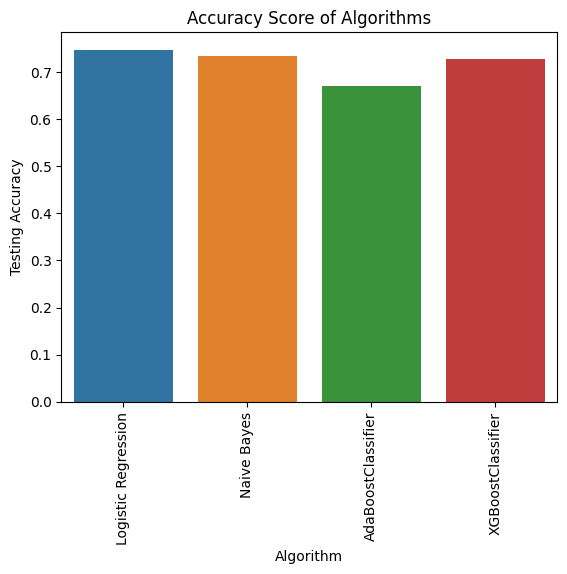

In [41]:
sns.barplot(x=Accuracy_Table["Algorithm"],y=Accuracy_Table["Testing Accuracy"],hue=Accuracy_Table["Algorithm"])
plt.xticks(rotation=90)
plt.title("Accuracy Score of Algorithms")
plt.show()

# Time Complexity Comparsion of Algorithms

In [42]:
TImecomplex_Table=pd.DataFrame({"Algorithm":["Logistic Regression","Naive Bayes","AdaBoostClassifier","XGBoostClassifier"],
                                "Time Complexity":[lg_time,MB_time,ada_time,xgb_time]})
TImecomplex_Table

,Algorithm,Time Complexity
0,Logistic Regression,2.126001
1,Naive Bayes,0.278115
2,AdaBoostClassifier,106.159285
3,XGBoostClassifier,32.444786


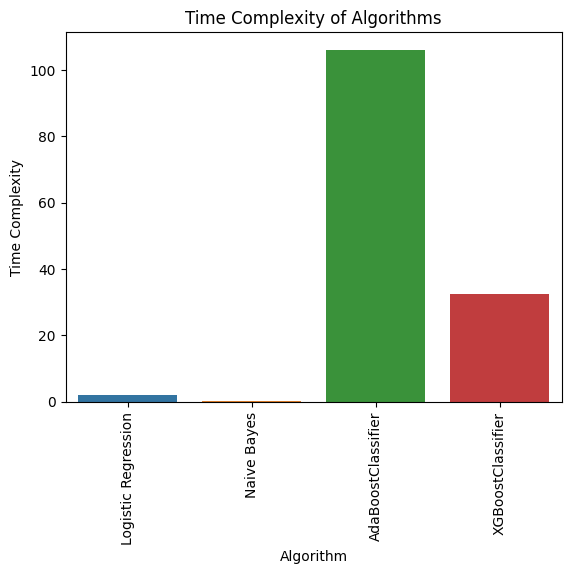

In [43]:
sns.barplot(x=TImecomplex_Table["Algorithm"],y=TImecomplex_Table["Time Complexity"],hue=TImecomplex_Table["Algorithm"])
plt.xticks(rotation=90)
plt.title("Time Complexity of Algorithms")
plt.show()

In [44]:
# Comparsion og AUC-ROC Curve

In [45]:
AUCROC_Table=pd.DataFrame({"Algorithm":["Logistic Regression","Naive Bayes","AdaBoostClassifier","XGBoostClassifier"],
                                "AUC-ROC":[roc_auc_lg,roc_auc_mb,roc_auc_ada,roc_auc_xgb]})
AUCROC_Table

,Algorithm,AUC-ROC
0,Logistic Regression,0.827613
1,Naive Bayes,0.818474
2,AdaBoostClassifier,0.743603
3,XGBoostClassifier,0.806514


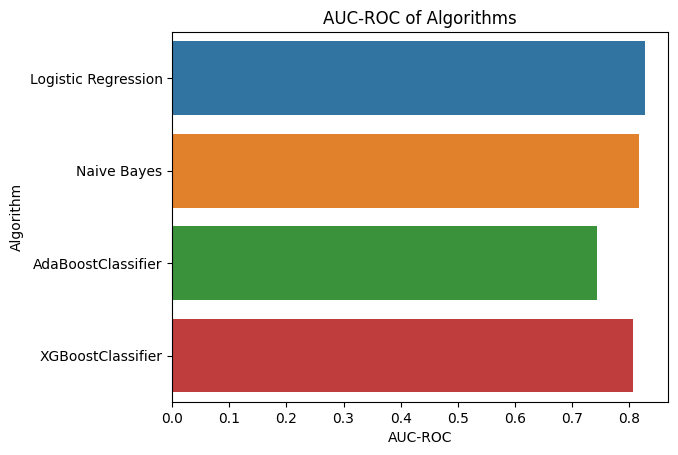

In [46]:
sns.barplot(y=AUCROC_Table["Algorithm"],x=AUCROC_Table["AUC-ROC"],hue=AUCROC_Table["Algorithm"])
plt.title("AUC-ROC of Algorithms")
plt.show()

# Pickling the file

In [47]:
filename="NaiveBayes_Tweets.pkl"
pickle.dump(Mb,open(filename,'wb'))

In [48]:
#loading the model
loaded_model=pickle.load(open(r"/kaggle/working/NaiveBayes_Tweets.pkl",'rb'))
loaded_model

MultinomialNB()

In [52]:
tfidf_pickle="tfidf1_tweets.pkl"
pickle.dump(tfidf,open(tfidf_pickle,"wb"))

In [53]:
#loading the model
loaded_model1=pickle.load(open(r"/kaggle/working/tfidf1_tweets.pkl",'rb'))
loaded_model1

TfidfVectorizer(max_features=1000)

In [ ]:
X_new=X_test1[200]
print(y_test[200])
prediction=loaded_model.predict(X_new)
print(prediction)

if prediction[0]==0:
  print("Negative")
else:
  print("Positive")

In [ ]:
X_new=X_test1[30]
print(y_test[30])
prediction=loaded_model.predict(X_new)
print(prediction)

if prediction[0]==0:
  print("Negative")
else:
  print("Positive")

In [ ]:
X_new=X_test1[3]
print(y_test[3])
prediction=loaded_model.predict(X_new)
print(prediction)

if prediction[0]==0:
  print("Negative")
else:
  print("Positive")